In [54]:
# from google.colab import drive
# drive.mount('/content/drive')


In [55]:
#pip install keras==2.10.0

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
#pip install segmentation-models==1.0.1

In [58]:
pip install segmentation-models-3D==1.0.6

  Using cached segmentation_models_3D-1.0.6-py3-none-any.whl.metadata (628 bytes)
INFO: pip is looking at multiple versions of segmentation-models-3d to determine which version is compatible with other requirements. This could take a while.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.8.0 (from segmentation-models-3d) (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.8.0


In [59]:
#pip install tensorflow

In [60]:
#pip install nibabel

In [61]:
pip install --upgrade numpy==1.26

Note: you may need to restart the kernel to use updated packages.


In [62]:
#pip install tifffile

In [63]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install matplotlib

In [65]:
#pip install split-folders

In [66]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [67]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imwrite

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [69]:
TRAIN_DATASET_PATH = 'C:/Users/Virgo_R/Documents/Brats2020/Data_Raw/BRATS_2020'
#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

In [70]:
import os

# Check the folder and its contents
folder_path = r'C:\Users\Virgo_R\Documents\Brats2020\Data_Raw\BRATS_2020\BraTS2020_TrainingData'

# List all folders
print("Folders found in BraTS2020_TrainingData:")
print(os.listdir(folder_path))

# Check if the 'BraTS20_Training_335' folder exists
subfolder = 'BraTS20_Training_335'
if subfolder in os.listdir(folder_path):
    print(f"\nFiles inside {subfolder}:")
    print(os.listdir(os.path.join(folder_path, subfolder)))
else:
    print(f"\n'{subfolder}' not found. Please double-check the folder name.")


Folders found in BraTS2020_TrainingData:
['combined255.npy', 'combined255.tif', 'input_data_128', 'input_data_3channel', 'MICCAI_BraTS2020_TrainingData']

'BraTS20_Training_335' not found. Please double-check the folder name.


In [71]:
import os

# Check inside the actual BraTS training folder
real_data_path = r'C:\Users\Virgo_R\Documents\Brats2020\Data_Raw\BRATS_2020\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData'

print("Subfolders found in MICCAI_BraTS2020_TrainingData:")
print(os.listdir(real_data_path))


Subfolders found in MICCAI_BraTS2020_TrainingData:
['BraTS20_Training_001', 'BraTS20_Training_002', 'BraTS20_Training_003', 'BraTS20_Training_004', 'BraTS20_Training_005', 'BraTS20_Training_006', 'BraTS20_Training_007', 'BraTS20_Training_008', 'BraTS20_Training_009', 'BraTS20_Training_010', 'BraTS20_Training_011', 'BraTS20_Training_012', 'BraTS20_Training_013', 'BraTS20_Training_014', 'BraTS20_Training_015', 'BraTS20_Training_016', 'BraTS20_Training_017', 'BraTS20_Training_018', 'BraTS20_Training_019', 'BraTS20_Training_020', 'BraTS20_Training_021', 'BraTS20_Training_022', 'BraTS20_Training_023', 'BraTS20_Training_024', 'BraTS20_Training_025', 'BraTS20_Training_026', 'BraTS20_Training_027', 'BraTS20_Training_028', 'BraTS20_Training_029', 'BraTS20_Training_030', 'BraTS20_Training_031', 'BraTS20_Training_032', 'BraTS20_Training_033', 'BraTS20_Training_034', 'BraTS20_Training_035', 'BraTS20_Training_036', 'BraTS20_Training_037', 'BraTS20_Training_038', 'BraTS20_Training_039', 'BraTS20_Tra

In [72]:

import nibabel as nib
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os

# Set correct dataset path
TRAIN_DATASET_PATH = r'C:\Users\Virgo_R\Documents\Brats2020\Data_Raw\BRATS_2020\BraTS2020_TrainingData\MICCAI_BraTS2020_TrainingData'

# Use MinMaxScaler
scaler = MinMaxScaler()

# Patient folder
patient_id = 'BraTS20_Training_335'
patient_path = os.path.join(TRAIN_DATASET_PATH, patient_id)

# File paths
flair_path = os.path.join(patient_path, patient_id + '_flair.nii')
t1_path = os.path.join(patient_path, patient_id + '_t1.nii')
t1ce_path = os.path.join(patient_path, patient_id + '_t1ce.nii')
t2_path = os.path.join(patient_path, patient_id + '_t2.nii')
seg_path = os.path.join(patient_path, patient_id + '_seg.nii')

# Load and normalize Flair
test_image_flair = nib.load(flair_path).get_fdata()
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, 1)).reshape(test_image_flair.shape)

# Load and normalize T1
test_image_t1 = nib.load(t1_path).get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, 1)).reshape(test_image_t1.shape)

# Load and normalize T1CE
test_image_t1ce = nib.load(t1ce_path).get_fdata()
test_image_t1ce = scaler.fit_transform(test_image_t1ce.reshape(-1, 1)).reshape(test_image_t1ce.shape)

# Load and normalize T2
test_image_t2 = nib.load(t2_path).get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, 1)).reshape(test_image_t2.shape)

# Load segmentation mask (no scaling)
test_mask = nib.load(seg_path).get_fdata().astype(np.uint8)

print("All images loaded and normalized successfully.")



All images loaded and normalized successfully.


In [73]:
print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask))

[0 1 2]
[0 1 2]


n_slice: 22


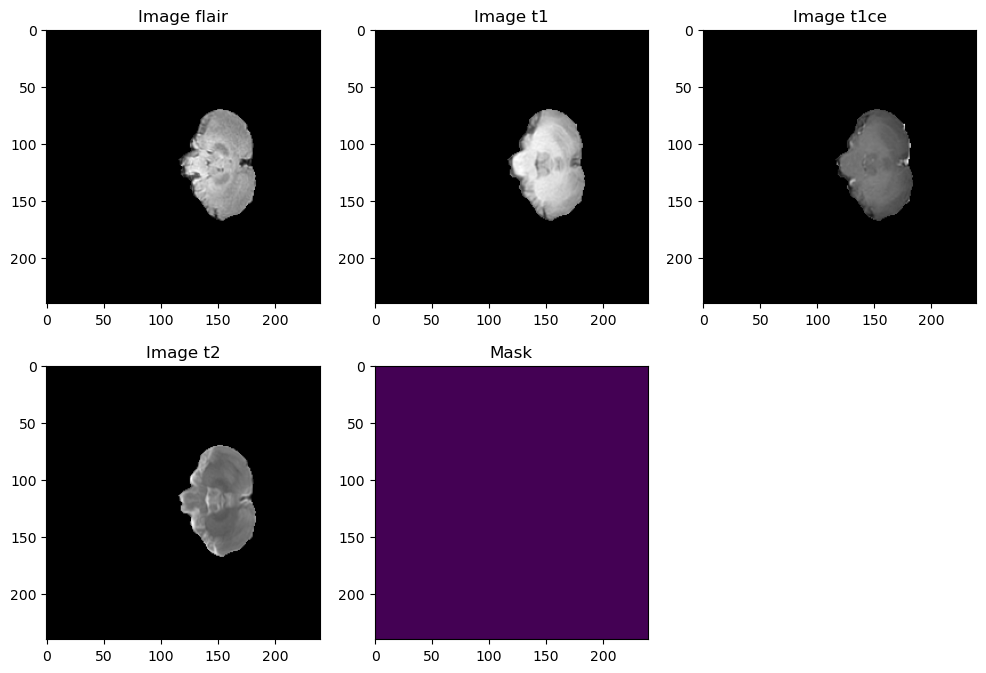

In [74]:
import random
n_slice=random.randint(0, test_mask.shape[2])
print("n_slice:", n_slice)
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [75]:
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)
combined_x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [76]:
combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4
combined_x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [77]:
test_mask= test_mask[56:184, 56:184, 13:141]
test_mask.shape

(128, 128, 128)

n_slice:  101


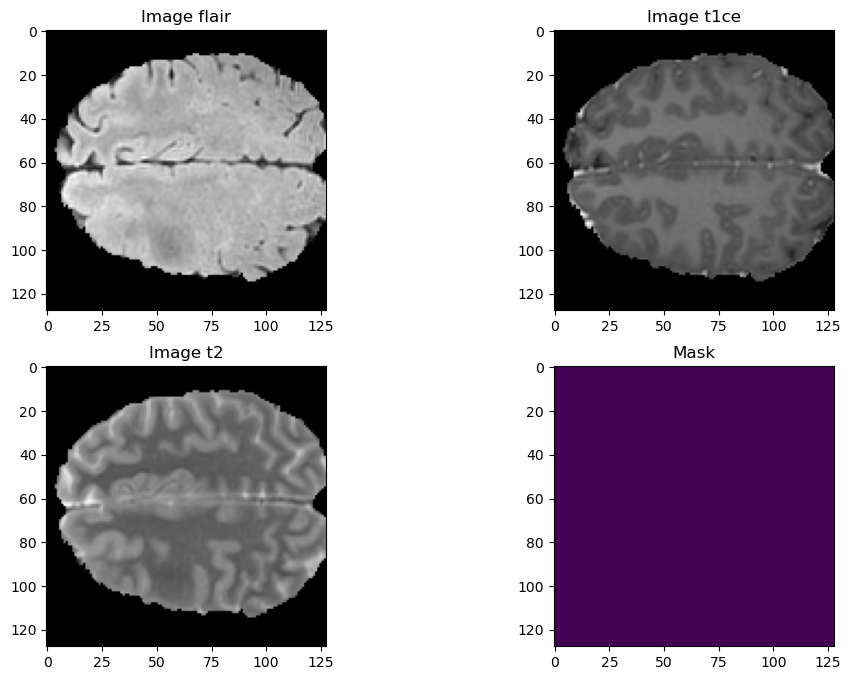

In [78]:
n_slice=random.randint(0, test_mask.shape[2])
print("n_slice: ", n_slice)
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [80]:
import numpy as np
import imageio  # for imwrite

# Save as image (ensure combined_x is uint8 and properly shaped for image)
imageio.imwrite('C:/sources/Teesta/BraTS2020_TrainingData/combined255.tif', combined_x)

# Save as numpy array
np.save('C:/sources/Teesta/BraTS2020_TrainingData/combined255.npy', combined_x)

# Load the numpy array
my_img = np.load('C:/sources/Teesta/BraTS2020_TrainingData/combined255.npy')


ValueError: Image must be 2D (grayscale, RGB, or RGBA).

In [17]:
test_mask = to_categorical(test_mask, num_classes=4)
test_mask

array([[[[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        ...,

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
 

In [2]:
#t1_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1.nii'))
t2_list = sorted(glob.glob('C:/sources/Teesta/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_list = sorted(glob.glob('C:/sources/Teesta/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('C:/sources/Teesta/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('C:/sources/Teesta/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

NameError: name 'glob' is not defined

In [19]:
t2_list[0]

'C:/sources/Teesta/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_001\\BraTS20_Training_001_t2.nii'

In [1]:
for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)

    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)

    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))


    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)

    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches.
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    val, counts = np.unique(temp_mask, return_counts=True)

    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('C:/sources/Teesta/BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('C:/sources/Teesta/BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)

    else:
        print("I am useless")

NameError: name 't2_list' is not defined

In [21]:
import splitfolders  # or import split_folders

input_folder = 'C:/sources/Teesta/BraTS2020_TrainingData/input_data_3channels/'
output_folder = 'C:/sources/Teesta/BraTS2020_TrainingData/input_data_128/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

In [2]:
#from tifffile import imsave, imread
import os
import numpy as np


def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):
        if (image_name.split('.')[1] == 'npy'):

            image = np.load(img_dir+image_name)

            images.append(image)
    images = np.array(images)

    return(images)




def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size

In [3]:
from matplotlib import pyplot as plt
import random

train_img_dir = "C:/sources/Teesta/BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "C:/sources/Teesta/BraTS2020_TrainingData/input_data_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2
train_img_list
train_mask_list

['mask_0.npy',
 'mask_1.npy',
 'mask_10.npy',
 'mask_101.npy',
 'mask_102.npy',
 'mask_103.npy',
 'mask_104.npy',
 'mask_105.npy',
 'mask_106.npy',
 'mask_108.npy',
 'mask_11.npy',
 'mask_112.npy',
 'mask_115.npy',
 'mask_116.npy',
 'mask_117.npy',
 'mask_118.npy',
 'mask_119.npy',
 'mask_122.npy',
 'mask_123.npy',
 'mask_124.npy',
 'mask_125.npy',
 'mask_127.npy',
 'mask_128.npy',
 'mask_129.npy',
 'mask_13.npy',
 'mask_131.npy',
 'mask_134.npy',
 'mask_135.npy',
 'mask_136.npy',
 'mask_139.npy',
 'mask_14.npy',
 'mask_140.npy',
 'mask_143.npy',
 'mask_144.npy',
 'mask_146.npy',
 'mask_148.npy',
 'mask_150.npy',
 'mask_151.npy',
 'mask_152.npy',
 'mask_153.npy',
 'mask_155.npy',
 'mask_156.npy',
 'mask_157.npy',
 'mask_158.npy',
 'mask_159.npy',
 'mask_160.npy',
 'mask_161.npy',
 'mask_162.npy',
 'mask_163.npy',
 'mask_164.npy',
 'mask_165.npy',
 'mask_166.npy',
 'mask_168.npy',
 'mask_169.npy',
 'mask_17.npy',
 'mask_170.npy',
 'mask_171.npy',
 'mask_172.npy',
 'mask_173.npy',
 'mask

In [25]:
train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()
msk

array([[[[[1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          ...,
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.]],

         [[1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          ...,
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.]],

         [[1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          ...,
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.]],

         ...,

         [[1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          ...,
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.]],

         [[1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          ...,
          [1., 0., 0., 0.],
          [1., 0., 0., 0.],
          [1., 0., 0., 0.]],

         [[1., 0., 0., 0.],
          [1., 0., 0., 0.],
    

n_slice:  54


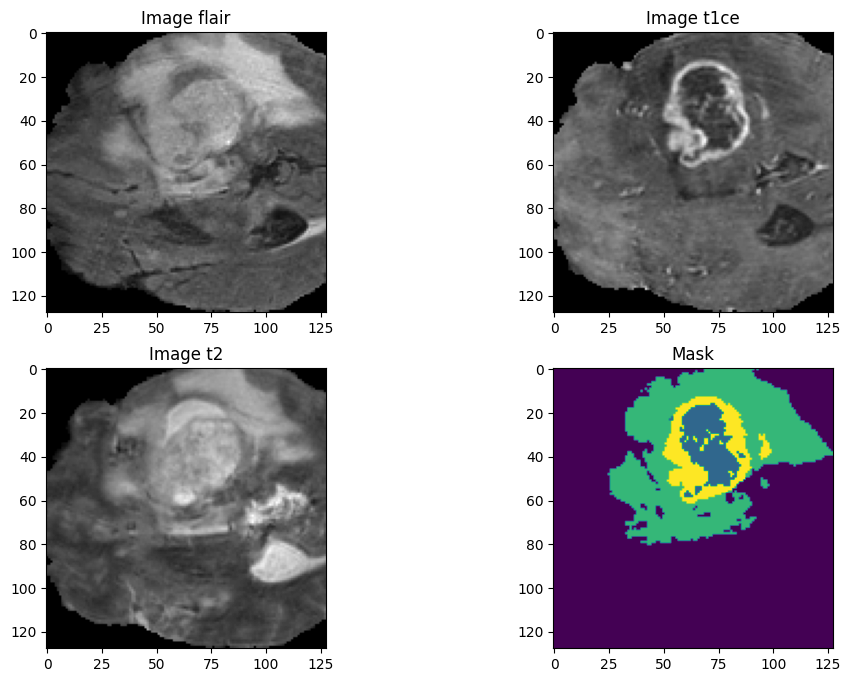

In [ ]:
img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))
print("n_slice: ", n_slice)
plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()